In [2]:
import re 
import requests
from bs4 import BeautifulSoup

In [35]:
page = requests.get("https://www.rottentomatoes.com/top/bestofrt/",headers={
    'user-agent':"Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0"
})

In [36]:
# curl 
page.status_code

200

In [5]:
page = page.text

In [7]:
page[:500]

'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n\t<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">\n    <script src="//cdn.optimizely.com/js/594670329.js"></script>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n\n    <meta name="google-site-verification" content="VPPXtECgUUeuA'

In [8]:
soup = BeautifulSoup(page,'lxml')

In [9]:
soup.title

<title>Top 100 Movies of All Time - Rotten Tomatoes</title>

In [18]:
f = open('tomato.html','w')
f.write(page)
f.close()

In [19]:
table = soup.find_all('table',{'class':'table'})

In [21]:
len(table)

1

In [22]:
table = table[0]

In [23]:
print(type(table))

<class 'bs4.element.Tag'>


In [25]:
names = table.find_all('a',{ 'class':"unstyled articleLink"})

In [28]:
len(names)

100

In [32]:
names[0].text.strip()

'Black Panther (2018)'

In [33]:
movies_name = list(map(lambda x:x.text.strip(),names))

In [34]:
movies_name[:5]

['Black Panther (2018)',
 'Lady Bird (2017)',
 'The Wizard of Oz (1939)',
 'Citizen Kane (1941)',
 'BlacKkKlansman (2018)']

In [38]:
# user-agenet

#requests.get()

In [40]:
ids = table.find_all('td',{"class":"bold"})

In [46]:
movies_id = list(map(lambda x:int(x.text.strip(".")),ids))

In [47]:
movies_id[:5]

[1, 2, 3, 4, 5]

In [45]:
len(movies_id)

100

In [48]:
score = table.find_all('span',{'class':"tMeterScore"})

In [49]:
len(score)

100

In [55]:
movie_score = list(map(lambda x:int(x.text.strip()[:-1]),score))

In [56]:
movie_score[:5]

[97, 99, 98, 100, 96]

In [57]:
len(movie_score)

100

In [58]:
review = table.find_all('td',{'class':"right hidden-xs"})

In [59]:
len(review)

100

In [63]:
movie_reviews = list(map(lambda x : int(x.text),review))

In [64]:
movie_reviews[:5]

[465, 362, 111, 80, 396]

In [66]:
movies_id[:5]

[1, 2, 3, 4, 5]

In [67]:
movies_name[:5]

['Black Panther (2018)',
 'Lady Bird (2017)',
 'The Wizard of Oz (1939)',
 'Citizen Kane (1941)',
 'BlacKkKlansman (2018)']

In [68]:
movie_score[:5]

[97, 99, 98, 100, 96]

In [69]:
l1=[1,2,3,4]
l2 =[ 6,5,4,3]
l3 = [ 1,2,3,4]

In [71]:
import pandas as pd
pd.DataFrame(list(zip(l1,l2,l3))).head()

,0,1,2
0,1,6,1
1,2,5,2
2,3,4,3
3,4,3,4


In [72]:
df = pd.DataFrame(list(zip(
movies_name,movie_reviews,movie_score)), columns=['Name','Review','Score'],
                 index=movies_id)

In [73]:
df.head()

,Name,Review,Score
1,Black Panther (2018),465,97
2,Lady Bird (2017),362,99
3,The Wizard of Oz (1939),111,98
4,Citizen Kane (1941),80,100
5,BlacKkKlansman (2018),396,96


In [75]:
df.shape

(100, 3)

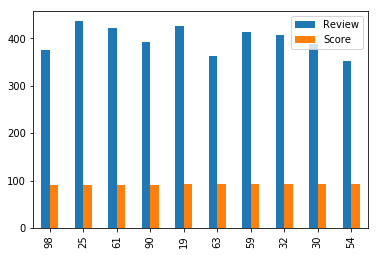

In [78]:
df.sort_values(by='Score')[:10].plot(kind='bar')